In [6]:
import iris
import os
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

In [2]:
cube, extent = iris.analysis.cartography.project(
                      iris.load_cube('/nesi/nobackup/nesi00442/thoma97p/'+
                      'cylc-run/u-ci501/share/data/History_Data/NEMOhist/archive_ready/'+
                      'nemo_ci501o_1m_20150101-20150201_grid-T.nc','soicecov'),
                                                 ccrs.PlateCarree(), nx=360, ny=180) 

# remove singleton time dimension
cube = iris.util.squeeze(cube)

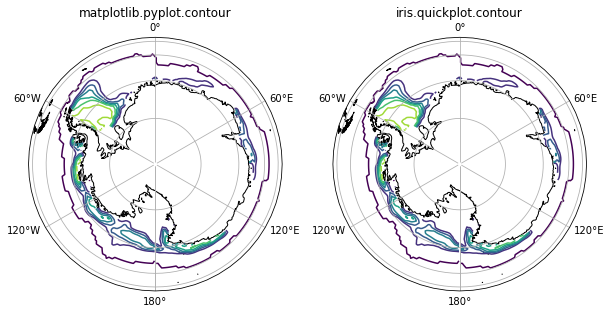

In [10]:
fig = plt.figure(figsize=[10,10])

titles = ['matplotlib.pyplot.contour','iris.quickplot.contour']

for i in range(2):

    ax = plt.subplot(1,2,i + 1,projection = ccrs.NearsidePerspective(central_latitude=-90, satellite_height=3.6e6))

    lons = cube.coord('longitude').points
    lats = cube.coord('latitude').points
    
    if i == 0:
        plt.contour(lons,
                lats,
                cube.data, transform = ccrs.PlateCarree())
    else:
        qplt.contour(cube)

    ax.coastlines()
    plt.title(titles[i])
    ax.gridlines(draw_labels = True)

savefig = True    
    
if savefig:
    plt.savefig(os.path.expanduser('~williamsjh/foo.pdf'))

plt.show();